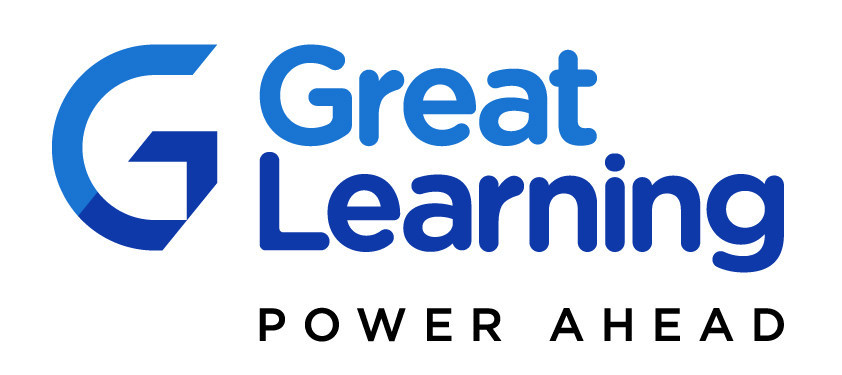

<h1><center><font size=10>Advanced Python - From Analytics to AI</center></font></h1>
<h1><center>Vector Databases - Setting up a Vector Database</center></h1>

## Recap

### Problem Statement

#### Business Context

In the world of online shopping, it's crucial for e-commerce platforms to help customers easily find and buy what they need. But with so many products available, it's a big challenge to make sure the right products are seen by the right people.

E-commerce sites face several key issues:

Lots of Products: There are so many different things to sell that it's hard to organize and categorize them all.
Search Problems: Traditional search tools don't always give the best results, especially if someone spells a word wrong or isn't very specific.
Keeping Customers Happy: It's important to make sure customers have a good experience and can find what they're looking for, so they keep coming back.

### Problem Definition
Big E-Commerce Company X (not x.com, X is an alias here) knows these challenges all too well. They have a huge range of products, from electronics to clothes to home items, and sorting them all out manually takes a lot of time. Plus, if they don't get it right, customers might struggle to find what they want.

As part of the Data Science team at Big E-Commerce Company X, the goal is to find a better way to help people discover products. By using clever techniques like embedding-based similarity search, the plan is to make searching for products easier and more accurate, so customers can find what they want quickly and easily.The perfect way to do this is by having a NLP based spelling correction system as first step and then using embedding similarity search as the second step. since we are limited by time in this session, we are going to step 2 directly.

Apart from product search, product recommendation can also be done using similarity search. We are going to do both search and product recommendation in this session.

The first step for both search and recommendation is converting the text(product description) into embeddings and storing it into a vector database. This process runs quickly with a GPU. After this step, we can implement the search and recommendation using a CPU itself. Hence, we are going to break this MLS into two notebooks. In the first one, we are going to setup the vectorDB using GPU and persist the vectorDB in Gdrive. In the second notebook, we are going to implement the search and recommendation on a CPU.

### Setup

In [ ]:
!pip install -q chromadb==0.4.22 \
                langchain==0.1.9 \
                langchain-community==0.0.32 \
                sentence-transformers==2.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from scipy.spatial.distance import cosine
import pandas as pd

from google.colab import userdata
from google.colab import drive

from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma


#### Importing the Embedding Model

In [ ]:
embedding_model_name = 'thenlper/gte-large'

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name=embedding_model_name)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

# Loading the saved vectorDB

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
persisted_vectordb_location = '/content/gdrive/MyDrive/products_db'

In [ ]:
vectorstore_persisted = Chroma(
    collection_name="product_embeddings",
    persist_directory=persisted_vectordb_location,
    embedding_function=embedding_model
)

We can now run the similarity search as before, but the database is hosted and streamed from Google Drive.

Let's run a quick test

In [ ]:
query = "rose scented perfume"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print('\n')

Retrieved chunk 1: 

Enlighten your mood with the instant sense gratification that the fragrance of Rose endows. Embellis the sentiment in the care of Glycerin. Enjoy your own floral paradise everyday from the company Generic at the price 56 with a discount of 13.85%


Retrieved chunk 2: 

Odour description: - rose (Blended with some top citrus notes to boost the impact of fragrance and provide a pleasant impact). from the company Girish And Company at the price 100 with a discount of 0%


Retrieved chunk 3: 

Real Rose Various facets of the floral world are infused to bring alive this sensuously charming fragrance. Top Notes:Green tea, Fresh Flowers. Heart Notes:Rose, Violet leaves. Base Notes:Rose, amber. from the company Arochem at the price 83 with a discount of 47.80%


Retrieved chunk 4: 

Enlighten your mood with the instant sense gratification that the fragrance of Rose endows. Embellish the sentiment in the care of Glycerin. Enjoy your own floral paradise everyday from the com

Perfect!

Now let's test our vector search with some customer search behaviour.

# Query

One important and frequent behaviour of consumer behaviour is searching with long natural language sentences instead of consice keywords like in product names. There used to be an early internet search engine called Ask Jeeves — which promised results from just such a query. Think “what sleeping bag is best for camping in below-freezing temps?” vs. “cold-weather sleeping bag.”

We will try to see if we can do the same with vectorDBs.

People also use slang instead of the formal name like - 'kicks vs shoes'. Consumer search products to fulfill their desires which reflects in their search patterns. Instead of searching for 'colourblocked premium Nike shoes" they will search for "kickass kicks".

Let's try few example searches for our product range.

In [ ]:
query = "I have bad odour, what should i do"

Instead of asking for a perfume, we are typing the problem. Even though bad odour is not in the description, relevant products are retrieved.

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Men Antibacterial Odour Protection Antiperspirant Deodorant helps fight body odour at the source, where it counts UK’s No.1 deodorant brand  Antiperspirant deodorant helps reduce 90%* of odour-causing bacteria  As you move, MotionSenseTM technology helps keep you fresh  Provides up to 48 hours of protection against sweat and body odour  Enjoy all day freshness with a clean fragrance  Alcohol**-free Don’t let sweat and body odour dictate your day: help fight odour at the source with Sure Men Antibacterial Odour Protection Antiperspirant Deodorant. Experience round-the-clock confidence from this men’s antiperspirant deodorant, rich with antibacterial protection that helps to reduce odour causing bacteria by up to 90%*. Lime Oil, Eucalyptus and Orange Turpine and MotionSenseTM technology helps keep you fresh when you need it most. Microcapsules sitting on the skin break when you move, delivering a burst of with every step. With up to 48 hours of protection, an antibac

In [ ]:
query = "My skin has gone dry provide shampoo"

Once again, we are searching a problem instead of a product. We would expect the ideal system to retrieve moisturising products like lotions and oils.

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Carrot Skin Lotion (591 ML) -- This wonderful portion formulated with vitamin e restores lost moisture and nourishes dry and damaged skin. It helps reducing wrinkles and keeps the skin youthful. Delon vitamin e body lotion is anti-inflammatory, which means it can help prevent redness and other general inflammation in our skin.

Zone 3 In 1 Shampoo, Body & Face Wash (400 ML) --  Make life easy and simplify your routine with Delon Zone 3 In 1 Shampoo, Body & Face Wash. Unique for Men.

 We want it all, don’t we? Well how about a body wash, face wash and shampoo by Delon, all in one? Lather up to a wonder body wash and get squeaky clean with this fabulous combo by Delon. Perfect on borke days. this combo is all you need to step out of your house all fresh and merry! 

 Key Features : 

 Contains essentials for great, squeaky clean skin. 

 Very economical and convenient for a travel purposes. 

 Lathers beautifully to give a luxurious bathing experience. 

 STEP 1 : P

In [ ]:
query = "I have bad odour, what should i do"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Men Antibacterial Odour Protection Antiperspirant Deodorant helps fight body odour at the source, where it counts UK’s No.1 deodorant brand  Antiperspirant deodorant helps reduce 90%* of odour-causing bacteria  As you move, MotionSenseTM technology helps keep you fresh  Provides up to 48 hours of protection against sweat and body odour  Enjoy all day freshness with a clean fragrance  Alcohol**-free Don’t let sweat and body odour dictate your day: help fight odour at the source with Sure Men Antibacterial Odour Protection Antiperspirant Deodorant. Experience round-the-clock confidence from this men’s antiperspirant deodorant, rich with antibacterial protection that helps to reduce odour causing bacteria by up to 90%*. Lime Oil, Eucalyptus and Orange Turpine and MotionSenseTM technology helps keep you fresh when you need it most. Microcapsules sitting on the skin break when you move, delivering a burst of with every step. With up to 48 hours of protection, an antibac

In [ ]:
query = "diabetes control product at cheap price with high discount"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

GOKUL’s Diabetes Care Juice is a 100% Natural and Organic remedy for Diabetes. The combined effect of this formula helps to control blood sugar levels effectively without any side effects. from the company Gokul Herbals at the price 188 with a discount of 20.00%
{'id': '1a55246823cdbd07ef9454f5ed2cee5a', 'price': '188'}


Retrieved chunk 2: 

Aashirvaad sugar release control atta, with low glycaemic index, releases sugar in your body, slowly, thus helps in sustained and steady blood sugar level. from the company Aashirvaad at the price 57 with a discount of 5.00%
{'id': '1b724e265c5b3d2c35d5f0004335e7c6', 'price': '57'}


Retrieved chunk 3: 

Insulin leaf tea is made out of costus pictus leaf with other herbal ingredients and it is Phyto nutrients helps the individual body immune system for reinvigorating the beta cells in the pancreas. It helps user to get control over sugar limit in the span of 30 days @ 2 to 3 cups tea daily. It acts as natural herbal sugar cont

Most of our product descriptions do not explicitly mention the word diabetes yet relevant products are searched effectively.

Let's try a very generic open ended query and see what kind of products are recommended.

In [ ]:
query = "impress girls"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Richly designed for mens and womens who want their presence to be felt, this riya impress Eau de parfum from the house of riya is a great pick. Comes with a refreshing long lasting fragrance, this perfume gives you a royal feeling that is reflected in your everyday attitude. The exotic aroma of this perfume will definitely overwhelm your special one. Aromatic and masculine, this perfume is sure to keep you charged and fresh throughout the day. You can buy this for not only yourself but also for your friends, family & relatives .Best parfum for Boys/ Mens  Fragrance Classification: Eau de Parfum  Fragrance Family: Fresh ,Floral  Fragrance Segment: Luxury from the company Riya at the price 325 with a discount of 0%
{'id': 'b79e82ba4fc1d3aae3c9bc47668b9d55', 'price': '325'}


Retrieved chunk 2: 

BelleGirl brings to you one of the most sought after collection of perfume from world famous. This fragrance is set to compliment your style and will make heads turn when you

In [ ]:
query = "high discount fruits"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Special Zipper Pack for extra Freshness. from the company Shara's Dry Fruits at the price 670 with a discount of 30.93%
{'id': '0bc34efd3031c35c7cbcbdc5d0c5ebb2', 'price': '670'}


Retrieved chunk 2: 

VACUUM PACKED HAND PICKED PREMIUM QUALITY DRY FRUITS HIGH QUALITY PRODUCTS from the company Nap at the price 369 with a discount of 32.79%
{'id': '019b287fa64a2aa2411d08d81527bf38', 'price': '369'}


Retrieved chunk 3: 

Fruit & Nut from the company Moddy's at the price 400 with a discount of 0%
{'id': '5b8ccb9b1662da2d6f287aadc56ac72c', 'price': '400'}


Retrieved chunk 4: 

Wonderland Dried Mixed Fruit 200g from the company WONDERLAND FOODS (DEVICE) at the price 287 with a discount of 4.33%
{'id': 'a1e6c2cd955e52a77d4bc2b993eb9eae', 'price': '287'}


Retrieved chunk 5: 

Robinsons Fruit & Barley Orange Squash 1000G from the company Robinsons at the price 3200 with a discount of 0%
{'id': '99c140f8d34dade516490b96d5880b01', 'price': '3200'}




Using the same embedding similarity, we can also find relevant products that we can recommend to the customer.

### Product Recommendations

For every product page a customer visits, we can recommend products that are similar to the current product. This can be one of the many inputs for a recommendation engine.

In [ ]:
query = "Flaxseeds are considered one of the most powerful plant foods on the planet. Rich in heart loving omega 3 essential fatty acids, lignans and both soluble and insoluble fibre, flaxseed bestows health benefits like no other."

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

The most similar one to the text above will be the same product and hence it will come up at the top. A business would put up code to remove it from the list and recommend the other products.

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Flaxseeds are considered one of the most powerful plant foods on the planet. Rich in heart loving omega 3 essential fatty acids, lignans and both soluble and insoluble fibre, flaxseed bestows health benefits like no other. from the company Organo Nutri at the price 221 with a discount of 35.00%
{'id': 'ff9c643890aaaf1b720587610ddfdd6b', 'price': '221'}


Retrieved chunk 2: 

Flaxseeds are considered one of the most powerful plant foods on the planet. Rich in heart loving omega 3 essential fatty acids, lignans and both soluble and insoluble fibre, flaxseed bestows health benefits like no other. from the company Organo Nutri at the price 130 with a discount of 35.00%
{'id': '25af44b3a0becc2ef0ddf530baea78b0', 'price': '130'}


Retrieved chunk 3: 

Kitchen & Health brings to you the world’s first cultivated superfood. Flax seeds help improve digestion, improve skin health, reduce sugar cravings and promote weight management. Flax seeds, sometimes called linseeds, are 

In [ ]:
query = "Cloves are the aromatic flower buds of a tree in the family Myrtaceae, scientifically termed as Syzygium aromaticum. It is commercially harvested in India, Madagascar, Zanzibar, Sri Lanka, and Tanzania. It is an important ingredient as a spice, which blends all across the North Indian cuisine, and is known as “Laung” in Hindi.  Cloves are an excellent source of manganese, a very good source of vitamin K and dietary fiber, and a good source of iron, magnesium, and calcium."

Let's assume the consumer is looking for cloves. It is common sense that the consumer will also want to buy other spices. Let's see if we get other spices or other cooking ingreedients as suggestions.

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Cloves are the aromatic flower buds of a tree in the family Myrtaceae, scientifically termed as Syzygium aromaticum. It is commercially harvested in India, Madagascar, Zanzibar, Sri Lanka, and Tanzania. It is an important ingredient as a spice, which blends all across the North Indian cuisine, and is known as “Laung” in Hindi.  Cloves are an excellent source of manganese, a very good source of vitamin K and dietary fiber, and a good source of iron, magnesium, and calcium. from the company The Tiny Hut at the price 66 with a discount of 31.25%
{'id': '3f60affbd7489032380f6593c6e03320', 'price': '66'}


Retrieved chunk 2: 

Cloves are the rich, brown, dried, unopened flower buds of Syzygium aromaticum, an evergreen tree in the myrtle family. The name comes from the French "clou" meaning nail. Cloves are native to the Molucca Islands, now a part of Indonesia and also from Madagascar and Sri Lanka. In addition to their sweet, aromatic flavour, cloves are known for thei

Alas! most of the products are cloves itself. We would want to suggest a mix of 'different' cloves and other related products. Let's try using the similarity score to get a good list of recommended products.

In [ ]:
query = "Cloves are the aromatic flower buds of a tree in the family Myrtaceae, scientifically termed as Syzygium aromaticum. It is commercially harvested in India, Madagascar, Zanzibar, Sri Lanka, and Tanzania. It is an important ingredient as a spice, which blends all across the North Indian cuisine, and is known as “Laung” in Hindi.  Cloves are an excellent source of manganese, a very good source of vitamin K and dietary fiber, and a good source of iron, magnesium, and calcium."

Let's first retrieve a handful of documents (say, 100) which we can then filter to get a good selection of

In [ ]:
doc_r = vectorstore_persisted.similarity_search_with_relevance_scores(query, k=100)

similarity_search_with_relevance_scores return a tuple of (docs, r). So, let's rewrite out printing logic to accomodate this.

In [ ]:
count = 0
for i, (doc,r) in enumerate(doc_r):
  if count < 5 and r < 0.80 and r >0.78: # r is inversely proportional to cosine_distance so higher score means higher similarity.
    # We are only selecting products between similarity scores of 0.8 and 0.78. This way products that are related but not the same product might surface.
    # The numbers are chosen pragmatically and there is no formula to come up with them
    count += 1 #To get only 5 results
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 15: 

GARLIC POWDER: A popular seasoning made from dried garlic flakes that have been ground into a powder.Garlic powder is often substituted if necessary for fresh garlic cloves, using 1/2 teaspoon of garlic powder to equal one fresh clove of common garlic.. It tastes sweeter and much less assertive than fresh garlic. Garlic powder is a popular ingredient in spice blends and dry rubs. It's used to season veggies and proves a welcome addition in snacks like popcorn and roasted nuts. Garlic powder can even be used to get brighter flavours in low-sodium dishes. Uses mixed with other spices and herbs to make a dry rub. Added to soups and stews. Whisked into vinaigrettes. Used as a seasoning in sauces. Added to gravies. Mixed in with bread or pasta dough. Sprinkled on pizza prior to baking. Mixed into burger when making hamburgers. GINGER POWDER: Scientifically known as Zingiber officinale, Ginger powder is a versatile spice that can be used for medicinal or culinary purpos

We got what we wanted. We were able to fetch products that are related to the product but is not the exact same product.

We can also try the max_marginal_relevance_search function to get diverse results. Let's see how it performs.

In [ ]:
docs = vectorstore_persisted.max_marginal_relevance_search(query,k=5, score_threshold = 0.1)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Retrieved chunk 1: 

Cloves are the aromatic flower buds of a tree in the family Myrtaceae, scientifically termed as Syzygium aromaticum. It is commercially harvested in India, Madagascar, Zanzibar, Sri Lanka, and Tanzania. It is an important ingredient as a spice, which blends all across the North Indian cuisine, and is known as “Laung” in Hindi.  Cloves are an excellent source of manganese, a very good source of vitamin K and dietary fiber, and a good source of iron, magnesium, and calcium. from the company The Tiny Hut at the price 66 with a discount of 31.25%
{'id': '3f60affbd7489032380f6593c6e03320', 'price': '66'}


Retrieved chunk 2: 

Cloves are the rich, brown, dried, unopened flower buds of Syzygium aromaticum, an evergreen tree in the myrtle family. The name comes from the French "clou" meaning nail. Cloves are native to the Molucca Islands, now a part of Indonesia and also from Madagascar and Sri Lanka. In addition to their sweet, aromatic flavour, cloves are known for thei

It doesn't seem to work as well as our hack with similarity score. A mix of different variations of the same product, related products can be recommended  by combining results from these different queries. We can further add other product recommendation techniques like collaborative filtering and content filtering to selected a handful of products for the customer however that is outside the scope of this session. For items like cloves, collaborative filtering would readily give the right recommendations however, with low frequency items or during cold start or with niche items, similarity scores based recommendation coould be quite handy.

**Power Ahead!**